# Goldratt's Dice Game

Based in the game played in the book "The Goal" by Dr. Eli Goldratt. This game is able to do a simulation of a flow system, and illustrate the impact of variation. 


Here it was used in the context of having 5 processes in a hospital and patients attending for their appointments. The number of patients that each part of the process is able to attend per day is given by the result on the dice roll.

In [394]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://media.giphy.com/media/pdSjtKuNpaQr6/giphy-downsized-large.gif")

Importing packages and initial setting state:

In [371]:
import numpy as np
from numpy import random
import pandas as pd
import seaborn as sns

Patients=np.array([0,0,0,0,0,0])
Days=np.array([0,0,0,0,0,0])
Capacity=np.array([0,0,0,0,0,0]) #number of the dice
Activity=np.array([0,0,0,0,0,0]) #number that you move

DaysWorking=np.array([1,2,3,4,5,6,7,8,9,10])
Stuff=np.array([1,2,3,4,5,0])
Person=np.array([1,2,3,4,5,0]) #Person who moved
Round=np.array([0,0,0,0,0,0])

Selecting the number of rounds:

In [395]:
Rounds=range(0,2000)

Dice Game Configuration:

In [373]:
for r in Rounds: #round start
    for d in DaysWorking: #days taken into account per round
        for s in Stuff: #team member
            Round=np.append(Round,r) #Round
            Dice=random.randint(1,7) #Dice

            Days=np.append(Days,d) #stablish the day
            Person=np.append(Person,s) #Store the id of the person's action
            Capacity=np.append(Capacity,Dice) #dice result is stored

            #Upgrades according to each member:
            if Person[-1]==1:
                Patients=np.append(Patients,0) #num pf patients in that state is equal to the dice
                Activity=np.append(Activity,Dice)
                Patients=np.append(Patients,Dice+Patients[-6]) #Upgrade for the next person

            elif Person[-1]==0: #this is the number of patients outsize
                Activity=np.append(Activity,0)

            else:          
                if Patients[-1]>=Dice:
                    Activity=np.append(Activity,Dice)
                    Patients=np.append(Patients,Dice+Patients[-6]) #Upgrade for the next person

                else:
                    Activity=np.append(Activity,Patients[-1])
                    Patients=np.append(Patients,Patients[-1]+Patients[-6]) #Upgrade for the next person
    
    #To reset initial states
    Patients=np.append(Patients,[0,0,0,0,0,0])
    Capacity=np.append(Capacity,[0,0,0,0,0,0]) 
    Activity=np.append(Activity,[0,0,0,0,0,0])
    Person=np.append(Person,[0,0,0,0,0,0]) 
    Round=np.append(Round,[0,0,0,0,0,0])
    Days=np.append(Days,[0,0,0,0,0,0])



Creating a dataframe with the arrays:

In [382]:
Results=pd.DataFrame()
Results["Round"]=Round
Results["Days"]=Days
Results["Hospital Department"]=Person
Results["Patients"]=Patients
Results["Capacity"]=Capacity
Results["Activity"]=Activity

FinalResults=Results[Results["Days"]!=0] #Cleaning the dataframe


Creating dataframe that contains only the information of the patients that finished their treatment per round

In [383]:
OnlyFinalPatients=FinalResults[(FinalResults["Hospital Department"]==0) & (FinalResults["Days"]==10)]
OnlyFinalPatients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 65 to 131999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Round                2000 non-null   int32
 1   Days                 2000 non-null   int32
 2   Hospital Department  2000 non-null   int32
 3   Patients             2000 non-null   int32
 4   Capacity             2000 non-null   int32
 5   Activity             2000 non-null   int32
dtypes: int32(6)
memory usage: 62.5 KB


<AxesSubplot:xlabel='Patients', ylabel='Count'>

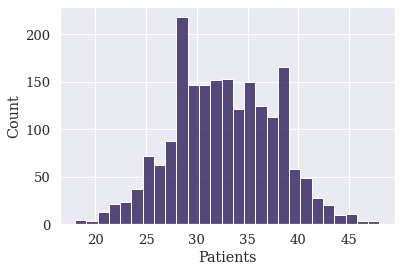

In [384]:
sns.set_theme(style="darkgrid", palette="magma",font_scale=1.2,font="serif")
sns.histplot(data=OnlyFinalPatients, x="Patients")

Creating a dataframe that indicates the average number of patients per each team member:

In [389]:
FinalPerTeamMember=FinalResults[(FinalResults["Hospital Department"]!=0) & (FinalResults["Days"]==10)]

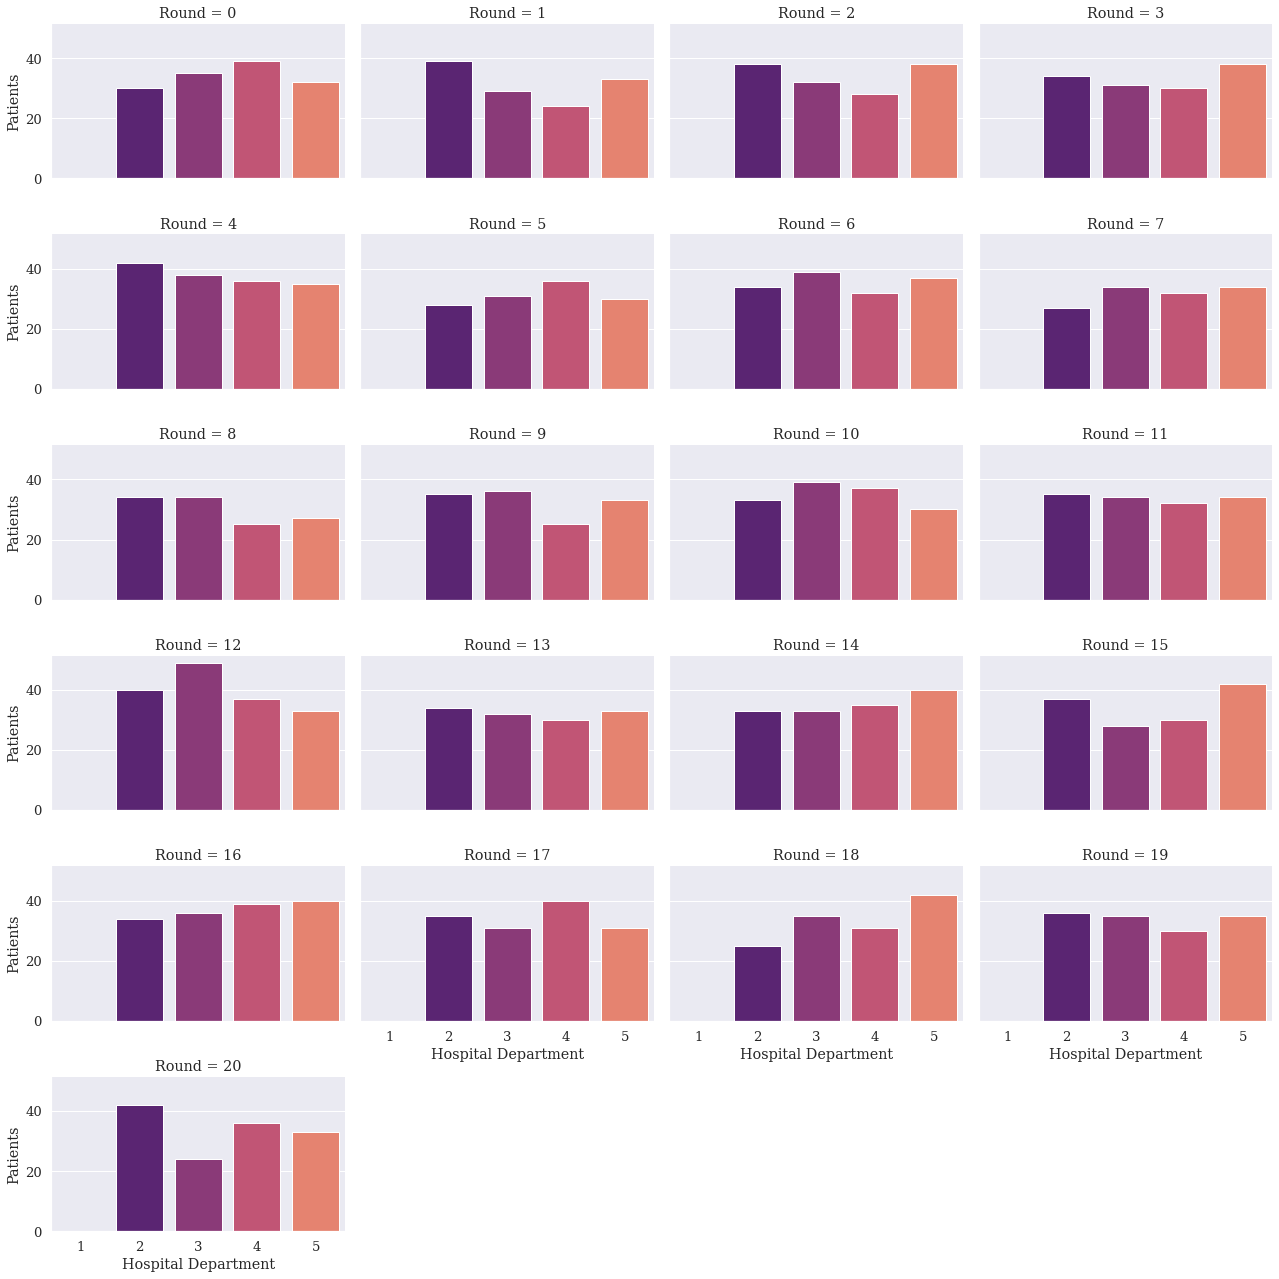

In [393]:
sns.catplot(x="Hospital Department", y="Patients", data=FinalPerTeamMember[FinalPerTeamMember["Round"]<=20],col="Round",col_wrap=4,kind="bar",height=3,aspect=1.5)

#The tallest bar tell us where the bottle neck was located in the first 20 rounds of the simulation.